# Exercise 13:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository.

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

1. Loading and visualizing data 1/1
2. Logistic classifier 2/2
3. Bootstrapped accuracy 3/3
4. Permutation test for grey matter effects 3/3
5. Reflection 1/1

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file.

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame.

In [ ]:
# working directory
setwd("/Users/katie/Documents/workspace/Data-Science-for-Psychology-and-Neuro/Homework-datasets/hcp_data/")

# load the data
data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

# check the structure of the data
str(data)

# load the necessary libraries
library(dplyr)
library(ggplot2)
library(tidyverse)

# create a d1 dataframe with only the necessary columns
d1 <- data %>% select(Subject, Gender, Flanker_Unadj, FS_IntraCranial_Vol, FS_Tot_WM_Vol, FS_Total_GM_Vol) %>% drop_na()

# check the first few rows of the data
head(d1)



'data.frame':	1206 obs. of  500 variables:
 $ Subject                                 : int  100004 100206 100307 100408 100610 101006 101107 101208 101309 101410 ...
 $ Release                                 : chr  "S900" "S900" "Q1" "Q3" ...
 $ Acquisition                             : chr  "Q06" "Q11" "Q01" "Q03" ...
 $ Gender                                  : chr  "M" "M" "F" "M" ...
 $ Age                                     : chr  "22-25" "26-30" "26-30" "31-35" ...
 $ MMSE_Score                              : int  29 30 29 30 30 28 29 30 29 29 ...
 $ PSQI_Score                              : int  8 6 4 4 4 2 9 6 5 8 ...
 $ PSQI_Comp1                              : int  1 1 1 1 1 1 1 1 1 1 ...
 $ PSQI_Comp2                              : int  2 1 0 1 1 1 1 2 1 2 ...
 $ PSQI_Comp3                              : int  2 1 1 0 0 0 3 0 2 2 ...
 $ PSQI_Comp4                              : int  1 1 0 0 0 0 3 0 0 0 ...
 $ PSQI_Comp5                              : int  1 1 2 1 1 0 0 2 1

,Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<dbl>,<int>,<int>
1,100206,M,130.42,1864518,543134,807245
2,100307,F,112.56,1512540,407292,664124
3,100408,M,121.18,1684117,500417,726206
4,100610,M,126.53,1816044,512946,762308
5,101006,F,101.85,1437868,429449,579632
6,101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color).

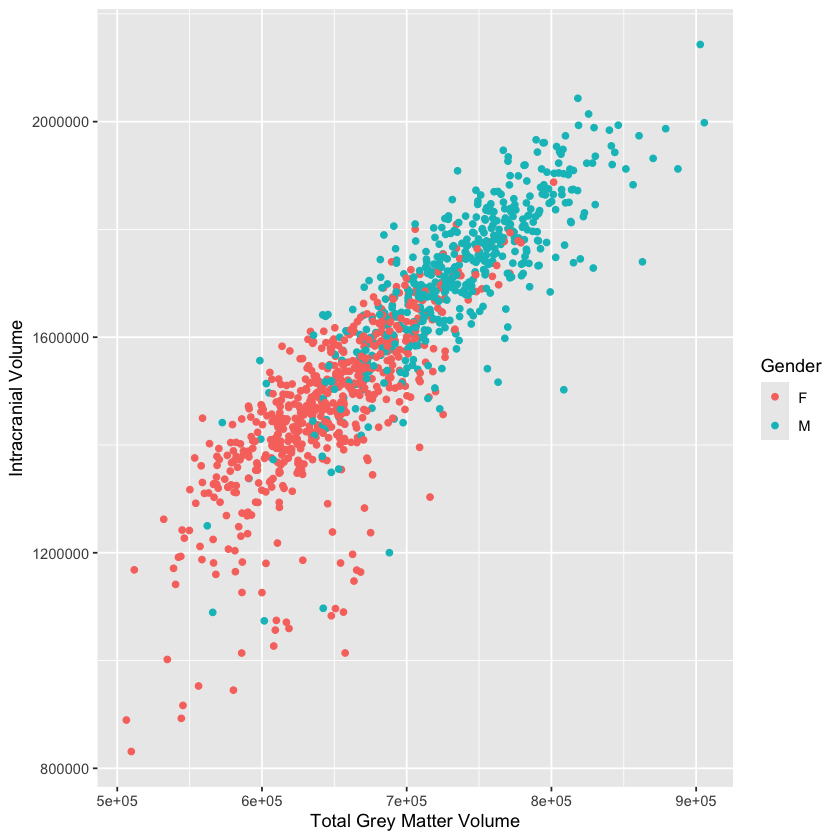

In [ ]:
ggplot(d1, aes(x = FS_Total_GM_Vol, y = FS_IntraCranial_Vol, color = Gender)) + geom_point() +
labs(
    Title = "Scatterplot of Total Grey Matter Volume and Intracranial Volume",
    x = "Total Grey Matter Volume",
    y = "Intracranial Volume",
    color = "Gender"
)

What patterns do you observe in the scatter plot?

> *Both total grey matter volume and intracranial volume are higher in the vast majority of male subjects as compared to female subjects; and seem strongly correlated with each other, across genders.*
>

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume.

In [ ]:
str(d1)
d1$Gender <- as.factor(d1$Gender)
names(d1)
gender_model <- glm(Gender ~ FS_Total_GM_Vol + FS_IntraCranial_Vol + FS_Tot_WM_Vol, data = d1, family = binomial)

summary(gender_model)



'data.frame':	1113 obs. of  6 variables:
 $ Subject            : int  100206 100307 100408 100610 101006 101107 101309 101410 101915 102008 ...
 $ Gender             : Factor w/ 2 levels "F","M": 2 1 2 2 1 2 2 2 1 2 ...
 $ Flanker_Unadj      : num  130 113 121 127 102 ...
 $ FS_IntraCranial_Vol: num  1864518 1512540 1684117 1816044 1437868 ...
 $ FS_Tot_WM_Vol      : int  543134 407292 500417 512946 429449 416995 491221 502143 405886 457952 ...
 $ FS_Total_GM_Vol    : int  807245 664124 726206 762308 579632 665024 707674 773472 676282 717215 ...


[1] "Subject"             "Gender"              "Flanker_Unadj"      
[4] "FS_IntraCranial_Vol" "FS_Tot_WM_Vol"       "FS_Total_GM_Vol"


Call:
glm(formula = Gender ~ FS_Total_GM_Vol + FS_IntraCranial_Vol + 
    FS_Tot_WM_Vol, family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7695  -0.6173  -0.1863   0.5997   3.2309  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -2.262e+01  1.347e+00 -16.787  < 2e-16 ***
FS_Total_GM_Vol      1.959e-05  3.145e-06   6.229 4.70e-10 ***
FS_IntraCranial_Vol  5.020e-06  1.177e-06   4.263 2.01e-05 ***
FS_Tot_WM_Vol        2.140e-06  3.059e-06   0.699    0.484    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

> *Total grey matter volume and intracranial volume are significantly associated with gender.*
>

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [ ]:
predicted_probabilities <- predict(gender_model, type = "response")
predicted_class <- ifelse(predicted_probabilities > 0.5, "M", "F")
table(predicted_class, d1$Gender)
accuracy <- sum(predicted_class == d1$Gender) / nrow(d1)
print(paste("Predicted accuracy: ", round(accuracy *100, 2), "%"))



               
predicted_class   F   M
              F 516 110
              M  90 397

[1] "Predicted accuracy:  82.03 %"


What is the prediction accuracy for gender from the full model?

>*Just over 82%.*
>

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model (i.e., the confidence of the correlation between $\hat{y}$ and $y$). Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot_accuracy, R = 1000)


Bootstrap Statistics :
     original        bias    std. error
t1* 0.8203055 -0.0004321653  0.01252872

[1] "95% Confidence Interval: [ 0.7951 %,  0.8446 %]"
Mean Bootstrapped Accuracy:  81.99 %
Standard Deviation of Bootstrapped Accuracies:  1.25 %
95% Confidence Interval: [ 79.53 %,  84.44 %]
[1] "Original Accuracy:  82.03 %"


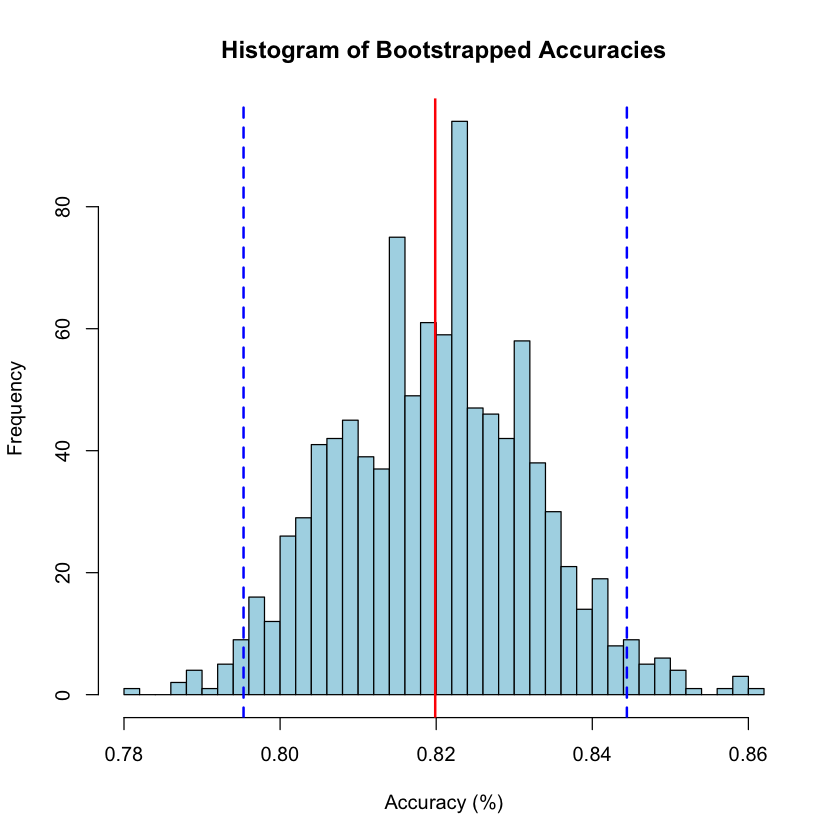

In [ ]:
library(boot)
set.seed(123)

boot_accuracy <- function(data, indices) {
    # create a bootstrap sample
    boot_sample <- data[indices, ]

    # fit the model
    boot_model <- glm(Gender ~ FS_Total_GM_Vol + FS_IntraCranial_Vol + FS_Tot_WM_Vol, data = boot_sample, family = binomial)

    # make predictions
    predicted_probabilities <- predict(boot_model, type = "response")
    predicted_class <- ifelse(predicted_probabilities > 0.5, levels(boot_sample$Gender)[2], levels(boot_sample$Gender)[1])
    predicted_class <- as.factor(predicted_class)

    # calculate accuracy
    accuracy <- sum(predicted_class == boot_sample$Gender) / nrow(boot_sample)
    return(accuracy)

}

boot_results <- boot(data = d1, statistic = boot_accuracy, R = 1000)
boot_results

# plot the histogram of the bootstrapped accuracies
hist(boot_results$t, breaks = 50, main = "Histogram of Bootstrapped Accuracies", xlab = "Accuracy (%)", col = "lightblue", border = "black")

# Calculate mean and standard deviation of bootstrapped accuracies
mean_accuracy <- mean(boot_results$t)
sd_accuracy <- sd(boot_results$t)

# Calculate 95% CI based on standard deviation of bootstrapped accuracies
ci_lower <- mean_accuracy - 1.96 * sd_accuracy
ci_upper <- mean_accuracy + 1.96 * sd_accuracy

# Add vertical lines for mean and confidence intervals
abline(v = mean_accuracy, col = "red", lwd = 2)
abline(v = c(ci_lower, ci_upper), col = "blue", lty = 2, lwd = 2)

# print the confidence interval
print(paste("95% Confidence Interval: [", round(boot_ci$bca[4], 4), "%, ", round(boot_ci$bca[5], 4), "%]"))

# results
cat("Mean Bootstrapped Accuracy: ", round(mean_accuracy * 100, 2), "%\n")
cat("Standard Deviation of Bootstrapped Accuracies: ", round(sd_accuracy * 100, 2), "%\n")
cat("95% Confidence Interval: [", round(ci_lower * 100, 2), "%, ", round(ci_upper * 100, 2), "%]\n")

# print the original accuracy
print(paste("Original Accuracy: ", round(accuracy *100, 2), "%"))

How robust is the prediction accuracy of the full model?

> *The prediction accuracy of the full model is robust. Our lower bound of confidence is over ~79% and upper is ~84% so we have a small range for our 95% confidence interval (which is good) and the original accuracy estimate falls in that range.*
>

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

Original Accuracy:  82.03 %
Mean Accuracy with permuted data:  80.54 %
Standard Deviation of permuted accuracies:  0.26 %


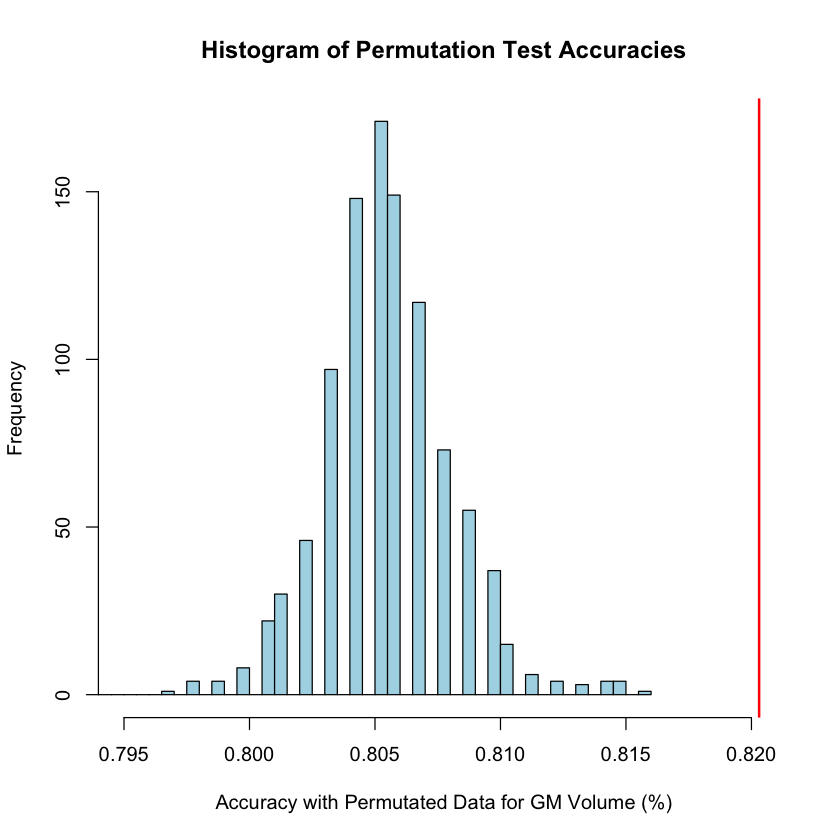

In [ ]:
# permutation test
set.seed(123)

# copy of original model and variables from above
gender_model <- glm(Gender ~ FS_Total_GM_Vol + FS_IntraCranial_Vol + FS_Tot_WM_Vol, data = d1, family = binomial)
predicted_probabilities <- predict(gender_model, type = "response")
predicted_class <- ifelse(predicted_probabilities > 0.5, "M", "F")
accuracy <- sum(predicted_class == d1$Gender) / nrow(d1)

# evaluate how much grey matter volume contributes to prediction accuracy
n_permutations <- 1000
permuted_accuracies <- numeric(n_permutations)

for (i in 1:n_permutations) {
    # create a permuted dataset
    d1_permuted <- d1
    d1_permuted$FS_Total_GM_Vol <- sample(d1_permuted$FS_Total_GM_Vol)

    # fit model with permutated data
    perm_model <- glm(Gender ~ FS_Total_GM_Vol + FS_IntraCranial_Vol + FS_Tot_WM_Vol, data = d1_permuted, family = binomial)

    # Calculate accuracy
    perm_probabilities <- predict(perm_model, type = "response")
    perm_predicted_class <- ifelse(perm_probabilities > 0.5, "M", "F")
    perm_predicted_class <- as.factor(perm_predicted_class)
    perm_accuracy <- sum(perm_predicted_class == d1_permuted$Gender) / nrow(d1_permuted)

    # store the accuracy
    permuted_accuracies[i] <- perm_accuracy
}

# plot a histogram of the permuted accuracies
hist(permuted_accuracies, breaks = 50, main = "Histogram of Permutation Test Accuracies", xlab = "Accuracy with Permutated Data for GM Volume (%)", col = c("lightblue"), border = "black", xlim = c(0.795, 0.8205))

# add a vertical line for the original accuracy
abline(v = accuracy, col = "red", lwd = 2)

# print the results
cat("Original Accuracy: ", round(accuracy * 100, 2), "%\n")
cat("Mean Accuracy with permuted data: ", round(mean(permuted_accuracies) * 100, 2), "%\n")
cat("Standard Deviation of permuted accuracies: ", round(sd(permuted_accuracies) * 100, 2), "%\n")


How much does the grey matter volume influence the prediction accuracy of the model?

> *Though this prediction is lower than the original accuracy, the model is more uniform as compared to the bootstrap that includes gender, and it also has a fairly small standard deviation, 0.26%, which is a good indicator that grey matter plays an important role in this model.*
>

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

> *The bootstrap is making all the comparisons, gender to the others, but the permutation test is essentially decoupling and looking at the columns as independent factors. As with the previous question, we see the importance of understanding the gender which, when excluded, reduces the predictive quality (from 82% to 80.5%). So, with that one example, I can see how permutation tests are especially important when factors are significantly correlated and you need to understand the nature of their impact. I originally considered that maybe the permutation revealed that grey matter was less important, given the accuracy went down and the variability decreased, i.e. something else was a bigger indicator; but with more thought, while taking gender out of the equation decreased the overall accuracy, we can see that grey matter was still an important indicator on its own. It's not a zero sum game in determining which are important.*
>

**DUE:** 5pm EST, March 27, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *as per usual, my coding tutor was claude.ai*